
# **Initiate and Configure Spark**

---


In [ ]:
#PySpark has been installed in order to support the collaboration of Apache Spark and Python, it actually is a Python API for Spark.
#Pyspark is a python API used for large scale data processing.
#Pyspark helps to analyse huge amount of structured or non-structured datas
!pip install pyspark

In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("Group10 ML Coursework").config("spark.some.config.option", "some-value").getOrCreate()


# **Importing Dataset From Drive**

In [ ]:
#Mounting google drive to colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



# **Load Data**

---


In [ ]:
#The Dataset is being loaded from the google drive
#The UNSW-NB15 dataset's raw network packets were generated by the IXIA PerfectStorm tool in the Australian Centre for Cyber Security's (ACCS) Cyber Range Lab 
#to create a hybrid of genuine modern regular activities and synthetic contemporary attack.

dataset = spark.read.csv('/content/drive/MyDrive/MLBigData/UNSW-NB15.csv',inferSchema=True, header =True)

In [ ]:
dataset.show()

+----------+-----+-------------+-----+---+---+------------+-----+------+---+---+---+---+--------+---------+---------+---+---+-----+-----+----------+----------+---+----+---+---+----------+---------+----------+----------+------------+------------+------------+------------+------------+---+---+---+---+---+---+---+---+---+---+---+---+----+---+
|59.166.0.3|56716|149.171.126.8|  143|tcp|FIN|  0.82546002| 7812| 16236| 31| 29| 30| 32|       -| 75090.25|156111.73|122|126|25518|25519|2751097753|2748686736| 64| 129|024|025| 445.25928| 474.9451|1421970774|1421970775|   6.8190908|    6.599896|5.9700001E-4|4.6899999E-4|    0.000128|035|036|037|038|039|  2|  7|142|  4|144|145|146|_c47|048|
+----------+-----+-------------+-----+---+---+------------+-----+------+---+---+---+---+--------+---------+---------+---+---+-----+-----+----------+----------+---+----+---+---+----------+---------+----------+----------+------------+------------+------------+------------+------------+---+---+---+---+---+---+---+---+

**Adding the column names**


In [ ]:
dataset=dataset.toDF("srcip","sport","dstip","dsport","proto","state","dur","sbytes","dbytes","sttl","dttl","sloss","dloss","service","Sload","Dload","Spkts","Dpkts","swin","dwin","stcpb","dtcpb","smeansz","dmeansz","trans_depth","res_bdy_len","Sjit","Djit","Stime","Ltime","Sintpkt","Dintpkt","tcprtt","synack","ackdat","is_sm_ips_ports","ct_state_ttl","ct_flw_http_mthd","is_ftp_login","ct_ftp_cmd","ct_srv_src","ct_srv_dst","ct_dst_ltm","ct_src_ltm","ct_dst_sport_ltm","ct_dst_src_ltm","srci","attack_cat","Label")
dataset.show()

+----------+-----+-------------+------+-----+-----+------------+------+------+----+----+-----+-----+--------+---------+---------+-----+-----+----+----+----------+----------+-------+-------+-----------+-----------+----------+---------+----------+----------+------------+------------+------------+------------+------------+---------------+------------+----------------+------------+----------+----------+----------+----------+----------+----------------+--------------+----+----------+-----+
|     srcip|sport|        dstip|dsport|proto|state|         dur|sbytes|dbytes|sttl|dttl|sloss|dloss| service|    Sload|    Dload|Spkts|Dpkts|swin|dwin|     stcpb|     dtcpb|smeansz|dmeansz|trans_depth|res_bdy_len|      Sjit|     Djit|     Stime|     Ltime|     Sintpkt|     Dintpkt|      tcprtt|      synack|      ackdat|is_sm_ips_ports|ct_state_ttl|ct_flw_http_mthd|is_ftp_login|ct_ftp_cmd|ct_srv_src|ct_srv_dst|ct_dst_ltm|ct_src_ltm|ct_dst_sport_ltm|ct_dst_src_ltm|srci|attack_cat|Label|
+----------+-----+--

In [ ]:
dataset.printSchema()

root
 |-- srcip: string (nullable = true)
 |-- sport: integer (nullable = true)
 |-- dstip: string (nullable = true)
 |-- dsport: integer (nullable = true)
 |-- proto: string (nullable = true)
 |-- state: string (nullable = true)
 |-- dur: double (nullable = true)
 |-- sbytes: integer (nullable = true)
 |-- dbytes: integer (nullable = true)
 |-- sttl: integer (nullable = true)
 |-- dttl: integer (nullable = true)
 |-- sloss: integer (nullable = true)
 |-- dloss: integer (nullable = true)
 |-- service: string (nullable = true)
 |-- Sload: double (nullable = true)
 |-- Dload: double (nullable = true)
 |-- Spkts: integer (nullable = true)
 |-- Dpkts: integer (nullable = true)
 |-- swin: integer (nullable = true)
 |-- dwin: integer (nullable = true)
 |-- stcpb: long (nullable = true)
 |-- dtcpb: long (nullable = true)
 |-- smeansz: integer (nullable = true)
 |-- dmeansz: integer (nullable = true)
 |-- trans_depth: integer (nullable = true)
 |-- res_bdy_len: integer (nullable = true)
 |-- S

**Counting the number of labels with 0 and 1**

In [ ]:
dataset.select('Label').groupBy('Label').count().orderBy('count', ascending=False).show()

+-----+-------+
|Label|  count|
+-----+-------+
|    0|2218455|
|    1| 321283|
+-----+-------+



**Counting the different types of attacks**

In [ ]:
dataset.select('attack_cat').groupBy('attack_cat').count().orderBy('count', ascending=False).show()

+---------------+-------+
|     attack_cat|  count|
+---------------+-------+
|           null|2218455|
|        Generic| 215481|
|       Exploits|  44525|
|       Fuzzers |  19195|
|            DoS|  16353|
|Reconnaissance |  12228|
|        Fuzzers|   5051|
|       Analysis|   2677|
|       Backdoor|   1795|
| Reconnaissance|   1759|
|     Shellcode |   1288|
|      Backdoors|    534|
|      Shellcode|    223|
|          Worms|    174|
+---------------+-------+




**Checking for null values**

In [ ]:
#In PySpark DataFrame we calculate the count of Null, None, NaN & Empty Blank values in a column by using isNull() of Column class & SQL functions isnan() count() and when().
from pyspark.sql.functions import col,isnan, when, count
dataset.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in dataset.columns]
   ).show()

+-----+-----+-----+------+-----+-----+---+------+------+----+----+-----+-----+-------+-----+-----+-----+-----+----+----+-----+-----+-------+-------+-----------+-----------+----+----+-----+-----+-------+-------+------+------+------+---------------+------------+----------------+------------+----------+----------+----------+----------+----------+----------------+--------------+----+----------+-----+
|srcip|sport|dstip|dsport|proto|state|dur|sbytes|dbytes|sttl|dttl|sloss|dloss|service|Sload|Dload|Spkts|Dpkts|swin|dwin|stcpb|dtcpb|smeansz|dmeansz|trans_depth|res_bdy_len|Sjit|Djit|Stime|Ltime|Sintpkt|Dintpkt|tcprtt|synack|ackdat|is_sm_ips_ports|ct_state_ttl|ct_flw_http_mthd|is_ftp_login|ct_ftp_cmd|ct_srv_src|ct_srv_dst|ct_dst_ltm|ct_src_ltm|ct_dst_sport_ltm|ct_dst_src_ltm|srci|attack_cat|Label|
+-----+-----+-----+------+-----+-----+---+------+------+----+----+-----+-----+-------+-----+-----+-----+-----+----+----+-----+-----+-------+-------+-----------+-----------+----+----+-----+-----+------

In [ ]:
#Change the null value in the attack_cat column as Normal traffic
dataset = dataset.fillna("Normal", subset = ["attack_cat"])

In [ ]:
dataset.select('attack_cat').groupBy('attack_cat').count().orderBy('count', ascending=False).show()

+---------------+-------+
|     attack_cat|  count|
+---------------+-------+
|         Normal|2218455|
|        Generic| 215481|
|       Exploits|  44525|
|       Fuzzers |  19195|
|            DoS|  16353|
|Reconnaissance |  12228|
|        Fuzzers|   5051|
|       Analysis|   2677|
|       Backdoor|   1795|
| Reconnaissance|   1759|
|     Shellcode |   1288|
|      Backdoors|    534|
|      Shellcode|    223|
|          Worms|    174|
+---------------+-------+




** FEATURE ENGINEERING**

---


In [ ]:
# Machine Learning Technique, configuration, etc.:
# APPLYING STRING INDEXER to transform the string columns into unique indexes
from pyspark.ml.feature import StringIndexer
indexer = StringIndexer(inputCol="proto", outputCol="proto1")
dataset = indexer.fit(dataset).transform(dataset)
indexer2 = StringIndexer(inputCol="state", outputCol="state1")
dataset = indexer2.fit(dataset).transform(dataset)
indexer3 = StringIndexer(inputCol="service", outputCol="service1")
dataset = indexer3.fit(dataset).transform(dataset)
indexer4 = StringIndexer(inputCol="attack_cat", outputCol="Attacks")
dataset = indexer4.fit(dataset).transform(dataset)


In [ ]:
#Dropping columns
dataset=dataset.drop("srcip","dstip","proto","state","service","attack_cat")

In [ ]:
#The Imputer estimator completes missing values in a dataset, either using the mean or the median of the columns in which the missing values are located.
from pyspark.ml.feature import Imputer
imputer=Imputer(inputCols=["sport","dsport","dur","sbytes","dbytes","sttl","dttl","sloss","dloss","Sload","Dload","Spkts","Dpkts","swin","dwin","stcpb","dtcpb","smeansz","dmeansz","trans_depth","res_bdy_len","Sjit","Djit","Stime","Ltime","Sintpkt","Dintpkt","tcprtt","synack","ackdat","is_sm_ips_ports","ct_state_ttl","ct_flw_http_mthd","is_ftp_login","ct_ftp_cmd","ct_srv_src","ct_srv_dst","ct_dst_ltm","ct_src_ltm","ct_dst_sport_ltm","ct_dst_src_ltm","srci","proto1","state1","service1"],outputCols=["sport","dsport","dur","sbytes","dbytes","sttl","dttl","sloss","dloss","Sload","Dload","Spkts","Dpkts","swin","dwin","stcpb","dtcpb","smeansz","dmeansz","trans_depth","res_bdy_len","Sjit","Djit","Stime","Ltime","Sintpkt","Dintpkt","tcprtt","synack","ackdat","is_sm_ips_ports","ct_state_ttl","ct_flw_http_mthd","is_ftp_login","ct_ftp_cmd","ct_srv_src","ct_srv_dst","ct_dst_ltm","ct_src_ltm","ct_dst_sport_ltm","ct_dst_src_ltm","srci","proto1","state1","service1"])
model=imputer.fit(dataset)
dataset=model.transform(dataset)
dataset.show(5)

+-----+------+-----------+------+------+----+----+-----+-----+---------+---------+-----+-----+----+----+----------+----------+-------+-------+-----------+-----------+---------+---------+----------+----------+---------+----------+------------+------------+------------+---------------+------------+----------------+------------+----------+----------+----------+----------+----------+----------------+--------------+----+-----+------+------+--------+-------+
|sport|dsport|        dur|sbytes|dbytes|sttl|dttl|sloss|dloss|    Sload|    Dload|Spkts|Dpkts|swin|dwin|     stcpb|     dtcpb|smeansz|dmeansz|trans_depth|res_bdy_len|     Sjit|     Djit|     Stime|     Ltime|  Sintpkt|   Dintpkt|      tcprtt|      synack|      ackdat|is_sm_ips_ports|ct_state_ttl|ct_flw_http_mthd|is_ftp_login|ct_ftp_cmd|ct_srv_src|ct_srv_dst|ct_dst_ltm|ct_src_ltm|ct_dst_sport_ltm|ct_dst_src_ltm|srci|Label|proto1|state1|service1|Attacks|
+-----+------+-----------+------+------+----+----+-----+-----+---------+---------+----

In [ ]:
#FINDING THE CORRELATION AMONG THE FEATURES USING PEARSON CORRELATION. 
#A Pearson correlation is a number between -1 and +1 that indicates to which extent 2 variables are linearly related.
from pyspark.mllib.stat import Statistics
import pandas as pd
features = dataset.rdd.map(lambda row: row[0:])
corr_matrix=Statistics.corr(features, method="pearson")

In [ ]:
from py4j.java_gateway import java_import
datadf = pd.DataFrame(corr_matrix)
datadf.columns=datadf.columns+1
datadf.index=datadf.index+1

In [ ]:
def my_abs(value):
    if value<0:
        return -value
    return value

In [ ]:
# SET A THRESHOD 0.70 AND DROP THE COLUMNS WITH A THRESHOLD GREATER THAN 0.70
col_corr=set()
threshold=0.70
for i in range(len(datadf.columns)):
  for j in range(i):
    z=my_abs(datadf.iloc[i, j])
    if z > threshold:
      colname=datadf.columns[i]
      col_corr.add(colname)

In [ ]:
droplist=[col_corr]

In [ ]:
for c in range(len(dataset.columns)):
  for j in range(len(droplist)):
    if(dataset.columns[c]==droplist[j]):
      dataset=dataset.drop("dataset.columns[c]")

In [ ]:
data=dataset

In [ ]:
# Remove the Label Column
cols=data.columns
cols.remove("Label")

In [ ]:
#VectorAssembler is a transformer that combines a given list of columns into a single vector column   "features". we provide all the columns of the dataset as Input 
from pyspark.ml.feature import VectorAssembler
assembler = VectorAssembler(inputCols=cols,outputCol="features")
# Now let us use the transform method to transform our dataset
data=assembler.transform(data)
data.select("features").show(truncate=False)

+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|features                                                                                                                                                                                                                                                                                                                               |
+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|[43467.0,

In [ ]:
#StandardScaler:Standardize features by removing the mean and scaling to unit variance.
from pyspark.ml.feature import StandardScaler
standardscaler=StandardScaler().setInputCol("features").setOutputCol("Scaled_features")
data=standardscaler.fit(data).transform(data)
data.select("features","Scaled_features").show(5)

+--------------------+--------------------+
|            features|     Scaled_features|
+--------------------+--------------------+
|[43467.0,49729.0,...|[2.12643923891384...|
|[41289.0,9574.0,0...|[2.01988979537382...|
|[43785.0,6881.0,2...|[2.14199604471996...|
|[40691.0,6881.0,2...|[1.99063517313464...|
|[20393.0,5190.0,0...|[0.99764132328364...|
+--------------------+--------------------+
only showing top 5 rows



In [ ]:
#Split the dataset in to train and test. 80% of dataset is for training data and 20 % is for testing
train, test = data.randomSplit([0.8, 0.2], seed=12345)

In [ ]:
#imbalance in the dataset, observe the use of Where.
dataset_size=float(train.select("Label").count())
numPositives=train.select("Label").where('Label == 1').count()
per_ones=(float(numPositives)/float(dataset_size))*100
numNegatives=float(dataset_size-numPositives)
print('The number of ones are {}'.format(numPositives))
print('Percentage of ones are {}'.format(per_ones))

The number of ones are 257232
Percentage of ones are 12.657385738495119


In [ ]:
BalancingRatio= numNegatives/dataset_size
print('BalancingRatio = {}'.format(BalancingRatio))

BalancingRatio = 0.8734261426150488


In [ ]:
# balance
train=train.withColumn("classWeights", when(train.Label == 1,BalancingRatio).otherwise(1-BalancingRatio))
train.select("classWeights").show(5)

+------------------+
|      classWeights|
+------------------+
|0.1265738573849512|
|0.1265738573849512|
|0.1265738573849512|
|0.1265738573849512|
|0.1265738573849512|
+------------------+
only showing top 5 rows



In [ ]:
# Building a classification model using Logistic Regression (LR).Logistic Regression is a Machine Learning algorithm which is used for the classification problems, 
#it is a predictive analysis algorithm and based on the concept of probability.
from pyspark.ml.classification import LogisticRegression
lr = LogisticRegression(labelCol="Label", featuresCol="Scaled_features",weightCol="classWeights",maxIter=10)
model=lr.fit(train)
predict_train=model.transform(train)
predict_test=model.transform(test)
Predict_label=predict_test.select("Label","prediction")

In [ ]:
# Evaluating the Binary Classifier Model
from pyspark.ml.evaluation import BinaryClassificationEvaluator

evaluator=BinaryClassificationEvaluator(rawPredictionCol='prediction',labelCol="Label")
auroc = evaluator.evaluate(predict_test, {evaluator.metricName: "areaUnderROC"})

print("Area under ROC Curve: {:.4f}".format(auroc))

predict_test.select("Label","prediction","probability").show(15)

Area under ROC Curve: 0.9984
+-----+----------+--------------------+
|Label|prediction|         probability|
+-----+----------+--------------------+
|    0|       0.0|[0.99999955319388...|
|    0|       0.0|[0.99999950158981...|
|    0|       0.0|[0.99999950158981...|
|    0|       0.0|[0.99999950164199...|
|    0|       0.0|[0.99962825430505...|
|    0|       0.0|[0.99985375900096...|
|    0|       0.0|[0.99999979977662...|
|    0|       0.0|[0.99999980402496...|
|    0|       0.0|[0.99999980418630...|
|    0|       0.0|[0.99999980420284...|
|    0|       0.0|[0.99985391027849...|
|    0|       0.0|[0.99999980425971...|
|    0|       0.0|[0.99999980427193...|
|    0|       0.0|[0.99999980428087...|
|    0|       0.0|[0.99999980429698...|
+-----+----------+--------------------+
only showing top 15 rows



In [ ]:
# Machine Learning Technique, configuration, etc.:
# Place your notes here. 
# this is code for multiple classification using logistic Regression . For the MultiClassifier we use oneVsRest Method.

In [ ]:
from pyspark.ml.classification import OneVsRest
from pyspark.ml.classification import LogisticRegression
train, test = data.randomSplit([0.8, 0.2], seed = 2018)
lr = LogisticRegression(maxIter=100, \
                        
                        featuresCol="Scaled_features", \
                        
                        labelCol='Attacks')
ovr = OneVsRest(classifier=lr, \
                labelCol='Attacks', \
                featuresCol='features')
ovrModel = ovr.fit(train)
predictionsovr = ovrModel.transform(test)

In [ ]:
# Evaluate MultiClassification Model
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
evaluator = MulticlassClassificationEvaluator(\
labelCol="Attacks", predictionCol="prediction",\
metricName="accuracy")
accuracy = evaluator.evaluate(predictionsovr)
print("Test accuracy =  " , accuracy)

Test accuracy =   0.9888249878789551


In [ ]:
eval_accuracy = MulticlassClassificationEvaluator(labelCol="Attacks", predictionCol="prediction", metricName="accuracy")
eval_precision = MulticlassClassificationEvaluator(labelCol="Attacks", predictionCol="prediction",metricName="precisionByLabel")
eval_recall = MulticlassClassificationEvaluator(labelCol="Attacks", predictionCol="prediction", metricName="recallByLabel")
eval_f1 = MulticlassClassificationEvaluator(labelCol="Attacks", predictionCol="prediction", metricName="f1")

In [ ]:
MulticlassAccuracy = eval_accuracy.evaluate(predictionsovr)
precision = eval_precision.evaluate(predictionsovr)
recall=eval_recall.evaluate(predictionsovr)
f1 = eval_f1.evaluate(predictionsovr)

In [ ]:
print("Accuracy",MulticlassAccuracy)
print("Precision",precision)
print("Recall",recall)
print("F1",f1)



Accuracy 0.9888249878789551
Precision 1.0
Recall 0.9999977448221116
F1 0.9883706209740016


**BAGGING USING RANDOMFOREST CLASSIFIER**

In [ ]:
#RandomForest Classifier is used for Bagging technique to ensemble number of decision trees to make a 
#more efficient accurate classifier than average tree in the forest. So the whole performs 
#better than any of its parts. Here we use the Multiclass Classification Evaluator
from pyspark.ml.classification import RandomForestClassifier
#rf = RandomForestClassifier(featuresCol = 'features', labelCol = 'label')
rf = RandomForestClassifier(featuresCol='Scaled_features', labelCol='Attacks', maxDepth = 6,numTrees=20)
train, test = data.randomSplit([0.7, 0.2], seed = 2018)
rfModel = rf.fit(train)
prediction = rfModel.transform(test)
baggingevaluator = MulticlassClassificationEvaluator(\
labelCol="Attacks", predictionCol="prediction",\
metricName="accuracy")
baggingaccuracy = baggingevaluator.evaluate(prediction)
print("Bagging accuracy =  " ,baggingaccuracy)


Bagging accuracy =   0.9885806490551033


**BOOSTING USING GBT CLASSIFIER**

In [ ]:
# Boosting Using GBT Classifier.Boosting done sequentially with each predictor trying to correct the mistakes of its 
#predecessor.In this program we are using a GBT Classifier with different features like maxIter=10,maxDepth=10 etc.
#Labels are the dependent variable. GBT Classifiers are mainly used for Binary Classification. Here we used 
#the Scaled_featuress as featureCol and Label as labelCol.Spilt the data set into training and testing.Finally obtain a boosting Accuracy of 100%
from pyspark.ml.classification import GBTClassifier

ml = GBTClassifier(maxIter=10, featuresCol='Scaled_features', labelCol='Label',maxDepth=10)
train, test = data.randomSplit([0.8, 0.2], seed = 2018)
mlModel = ml.fit(train)
predictions = mlModel.transform(test)

boostevaluator = BinaryClassificationEvaluator(rawPredictionCol='prediction',labelCol="Label")
boostaccuracy = boostevaluator.evaluate(predictions)
print("Boosting accuracy =  " , boostaccuracy)


Boosting accuracy =   1.0


**BINARY CLASSIFICATION EVALUATION**

/usr/local/lib/python3.7/dist-packages/pyspark/sql/context.py:127: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning


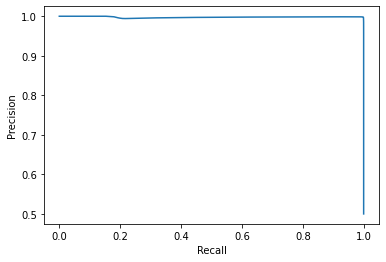

Model Accuracy 0.9983340768393572
FP rate [0.0010885115382230357, 0.002243334783059374]
TR rate [0.9977566652169406, 0.9989114884617769]


In [ ]:
print(model.summary)
import matplotlib.pyplot as plt
pr = model.summary.pr.toPandas()
plt.plot(pr['recall'],pr['precision'])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()
print("Model Accuracy",model.summary.accuracy)
print("FP rate",model.summary.falsePositiveRateByLabel)
print("TR rate",model.summary.truePositiveRateByLabel)

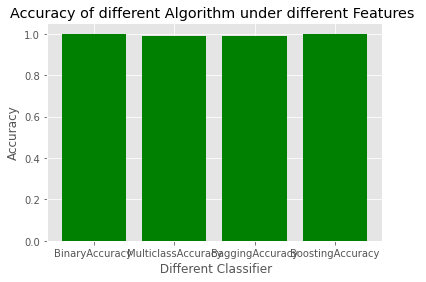

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

x = ['BinaryAccuracy ', 'MulticlassAccuracy' ,'BaggingAccuracy','BoostingAccuracy']
accuracy = [auroc, MulticlassAccuracy, baggingaccuracy, boostaccuracy]

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, accuracy, color='green')
plt.xlabel(" Different Classifier")
plt.ylabel("Accuracy")
plt.title("Accuracy of different Algorithm under different Features ")

plt.xticks(x_pos, x)

plt.show()